# **Simple Linear Regression**

## Understanding the Basics
Okay, let's start with the simplest form of regression: **one predictor → one outcome**.

Our example:
- **Age** → predictor  
- **Systolic Blood Pressure (SBP)** → outcome  

In real life, SBP tends to increase with age (not always, but on average). So it’s a great example to understand how regression captures such trends.

Let’s explore step-by-step without making things complicated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# For clean visuals
plt.style.use("ggplot")

## 1. Creating a Small Example Dataset

To learn regression properly, we’ll start with a tiny dataset, just enough to see patterns clearly.

We’ll create 10 observations of:
- Age (in years)
- SBP (Systolic Blood Pressure in mmHg)

We’ll simulate slightly noisy blood pressure values (because real-life data is never perfectly aligned).

In [2]:
# Creating a small dataset
np.random.seed(42)

age = np.array([25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
sbp = 95 + 0.8 * age + np.random.normal(0, 5, size=len(age))  # base + slope*age + noise

df = pd.DataFrame({"Age": age, "SBP": sbp})
df

,Age,SBP
0,25,117.483571
1,30,118.308678
2,35,126.238443
3,40,134.615149
4,45,129.829233
5,50,133.829315
6,55,146.896064
7,60,146.837174
8,65,144.652628
9,70,153.712800


## 2. Visualizing the Relationship

Before running any model, we always plot the data.😁

Why? It:
- Gives intuition
- Shows patterns (linear or not)
- Shows outliers
- Tells us whether regression even makes sense

Let’s plot Age vs SBP.

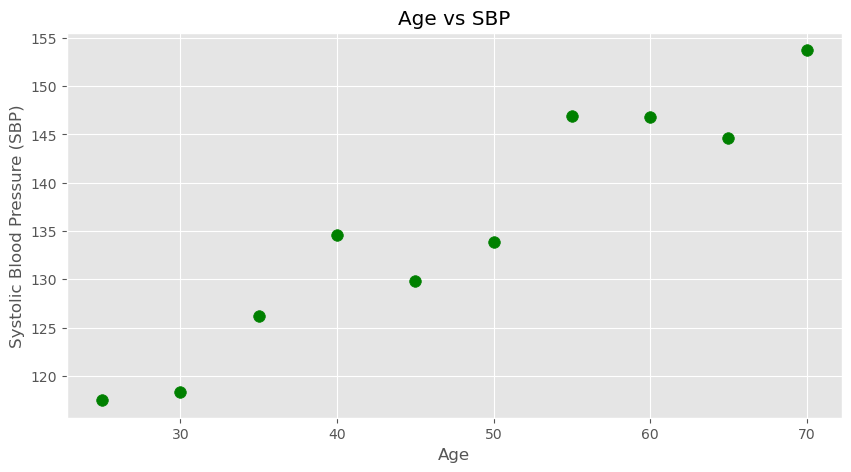

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(df["Age"], df["SBP"], s=70, c="g")
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure (SBP)")
plt.title("Age vs SBP")
plt.show()

**What do you see? Does SBP seem to increase with Age? Is it roughly linear?**

We can see a positive trend: as Age increases, SBP tends to increase too. This suggests a linear relationship, making regression a suitable choice. Great! Now, let's build our regression model step-by-step.

## 3. Building the Regression Model

To build a regression model using `statsmodels`, we follow three steps:

### Step 1: Select predictor(s)
Here we have only:
- `Age`

### Step 2: Add constant
This gives us the **intercept** (β₀), the "baseline" SBP.

### Step 3: Fit model
The model will calculate:
- β₀ (intercept)
- β₁ (slope)

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
X = df[["Age"]]           # predictor
X = sm.add_constant(X)    # adding intercept term
y = df["SBP"]             # outcome

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     88.31
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           1.35e-05
Time:                        01:14:17   Log-Likelihood:                -26.509
No. Observations:                  10   AIC:                             57.02
Df Residuals:                       8   BIC:                             57.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.5681      4.188     23.297      0.000      87.911     107.225
Age            0.7931      0.084      9.398      0.000       0.598       0.988
==============================================================================
Omnibus:                        0.936   Durbin-Watson:                   2.420
Prob(Omnibus):                  0.626   Jarque-Bera (JB):                0.719
Skew:                           0.361   Prob(JB):                        0.698
Kurtosis:                       1.903   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, you may get an UserWarning something like: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
```py
  return hypotest_fun_in(*args, **kwds)
```

This is just a warning about the small sample size. For learning purposes, we can ignore it. In real analyses, larger samples are preferred for reliable statistics. 

Because of this, some of the statistical tests (like p-values) may not be very reliable with such a small dataset. However, for educational purposes, we can still proceed to understand how the regression works. So, you also use this to ignore warnings in your notebook:
```py
  import warnings
  warnings.filterwarnings("ignore")
```

### What's this summary telling us?
- **Intercept (β₀)**: Estimated baseline SBP when Age = 0 (not meaningful here, but part of the equation).
- **Slope (β₁)**: Estimated increase in SBP for each additional year of age.
```py
  SBP = β₀ + β₁ * Age
``` 
- **R-squared**: Proportion of variance in SBP explained by Age (0 to 1 scale).
- **p-value for Age**: Tests if the slope is significantly different from zero (i.e., if Age is a meaningful predictor of SBP).

### How does OLS work?
OLS stands for **Ordinary Least Squares**, a method used to estimate the parameters (β₀ and β₁) of the linear regression model. It works by minimizing the sum of the squared differences between the observed values and the values predicted by the model. This ensures that the best-fitting line is found for the data points.

## 4. Interpreting the Coefficients

Let’s break this down in simple terms:

- ### Intercept (β₀)
This is the predicted SBP when **Age = 0**.

Of course, no one has age 0 in adult datasets, but mathematically the line must start somewhere, and that’s the intercept.

- ### Slope (β₁)
This tells us **how much SBP increases for every 1 year increase in age.**

For Example:
- If β₁ = 0.82 
    - SBP increases by **0.82 units per year**.
A positive slope confirms that SBP tends to rise with age.

- ### R-squared
This tells us **how much variation** in SBP is explained by Age.

For Example:
- R² = 0.78 
    - 78% of SBP variation is explained by Age (good for such a tiny synthetic dataset)

## 5. Plotting the Regression Line

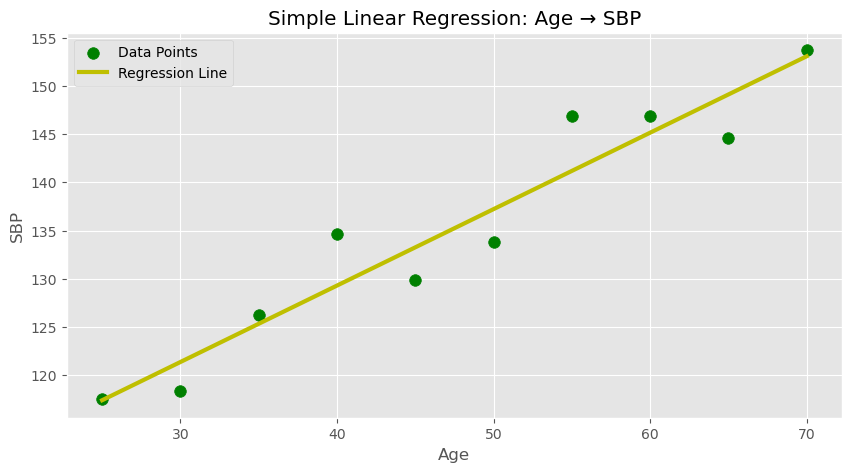

In [6]:
# Predict values using model
pred_sbp = model.predict(X)

plt.figure(figsize=(10, 5))
plt.scatter(df["Age"], df["SBP"], label="Data Points", s=70, c="g")
plt.plot(df["Age"], pred_sbp, label="Regression Line", linewidth=3, c="y")
plt.xlabel("Age")
plt.ylabel("SBP")
plt.title("Simple Linear Regression: Age → SBP")
plt.legend()
plt.show()

This visual clearly tells us the relationship between Age and SBP, along with the best-fit regression line that summarizes this relationship. As we can see, the regression line fits the data points quite well, indicating that our model captures the trend effectively.

## 6. Making Predictions

Let’s predict SBP for two hypothetical individuals:
- 42 years  
- 61 years  

Just to see how the model behaves.

In [7]:
new_ages = pd.DataFrame({"Age": [42, 61]})
new_ages = sm.add_constant(new_ages)

model.predict(new_ages)

0    130.878258
1    145.947151
dtype: float64

This means:
- For a 42-year-old, our model predicts an SBP of approximately 130.88 mmHg.
- For a 61-year-old, our model predicts an SBP of approximately 145.95 mmHg.

The `add_constant` function adds a column of 1s to the predictor variable(s). This is necessary because the regression model needs to estimate the intercept (β₀) along with the slope(s) (β₁, β₂, ...). Without this constant term, the model would be forced to go through the origin (0,0), which is usually not appropriate for real-world data.

Let's summarize what we've learned!

- **Simple Linear Regression** models the relationship between one predictor (Age) and one outcome (SBP).
- Our model estimates an intercept and slope to define the best-fit line.
- The slope indicates how much the outcome changes with a one-unit increase in the predictor.
- R-squared shows how well the predictor explains the outcome's variability.
- The regression line visually represents the relationship between the predictor and outcome.

Our model basically shows that Age is a significant predictor of SBP, with a positive relationship: as Age increases, SBP tends to increase as well. This simple example lays the foundation for understanding more complex regression analyses in the future!😁